In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys

import cantera as ct

In [2]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
sim.verbose = True

# limit advance when temperature difference is exceeded
delta_T_max = 20.
r.set_advance_limit('temperature', delta_T_max)

dt_max = 1.e-5
t_end = 100 * dt_max
states = ct.SolutionArray(gas, extra=['t'])

Initializing reactor network.
Reactor 0: 55 variables.
              0 sensitivity params.
Number of equations: 55
Maximum time step:                0


In [3]:
print('{:10s} {:10s} {:10s} {:14s}'.format(
    't [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time*1e3)
    print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(
            sim.time, r.T, r.thermo.P, r.thermo.u))

t [s]      T [K]      P [Pa]     u [J/kg]      
 1.000e-05   1001.000 101325.000  620761.940774
 2.000e-05   1001.000 101325.000  620761.940024
 3.000e-05   1001.000 101325.000  620761.937442
 4.000e-05   1001.000 101325.000  620761.932031
 5.000e-05   1001.000 101325.000  620761.922249
 6.000e-05   1001.000 101325.000  620761.905709
 7.000e-05   1001.000 101325.000  620761.878722
 8.000e-05   1001.000 101325.000  620761.835577
 9.000e-05   1001.001 101325.000  620761.767437
 1.000e-04   1001.001 101325.000  620761.660613
 1.100e-04   1001.001 101325.000  620761.493882
 1.200e-04   1001.002 101325.000  620761.234292
 1.300e-04   1001.003 101325.000  620760.830557
 1.400e-04   1001.005 101325.000  620760.202572
 1.500e-04   1001.008 101325.000  620759.224543
 1.600e-04   1001.012 101325.000  620757.697294
 1.700e-04   1001.019 101325.000  620755.301583
 1.800e-04   1001.030 101325.000  620751.516462
 1.900e-04   1001.048 101325.000  620745.469741
 2.000e-04   1001.076 101325.000  620735

    Limiting global state vector component 1 (dt =     5e-06):    30.8551 >        20
 3.586e-04   2231.230 101325.000  211502.091141
    Limiting global state vector component 1 (dt =     1e-05):    55.3917 >        20
    Limiting global state vector component 1 (dt =     5e-06):    29.1333 >        20
 3.611e-04   2246.203 101325.000  207110.098706
    Limiting global state vector component 1 (dt =     1e-05):    52.3489 >        20
    Limiting global state vector component 1 (dt =     5e-06):     27.551 >        20
 3.636e-04   2260.352 101325.000  202971.156817
    Limiting global state vector component 1 (dt =     1e-05):    49.7206 >        20
    Limiting global state vector component 1 (dt =     5e-06):    26.1214 >        20
 3.661e-04   2273.755 101325.000  199061.242814
    Limiting global state vector component 1 (dt =     1e-05):    47.3164 >        20
    Limiting global state vector component 1 (dt =     5e-06):    24.8152 >        20
 3.686e-04   2286.475 101325.000  

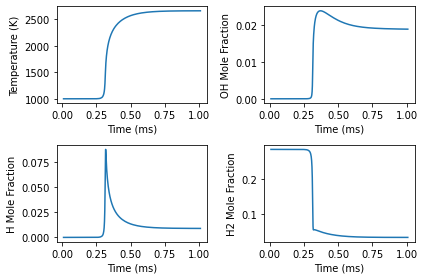

In [4]:
import matplotlib.pyplot as plt

plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:, gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:, gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:, gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

In [9]:
states.Y[-1, gas.species_index('H2')]

0.0027316673670645273

In [39]:
gas    = ct.Solution('gri30.yaml')
gas.TP = 900, 10.*ct.one_atm 
gas.set_equivalence_ratio(1.5, 'CH4:1.0', 'O2:1.0, N2:0.0', basis='mass')
gas.Y

array([0.        , 0.        , 0.        , 0.72672765, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27327235, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [24]:
import numpy as np

A = np.array([1.832460869724599908e-07,7.505045506380875326e-13,8.117427565282037291e-12,7.991605746552882250e-01,1.517857303302085139e-10,2.346138372951722944e-04,1.886356228512021133e-06,1.762631849859127060e-05,-1.296880806989962904e-15,-7.525465172986609707e-15,-1.326685437270000249e-09,-9.673602571103747463e-09,4.444584067488422797e-07,2.002135780882747240e-01,3.953348356823526837e-05,6.488651566556752514e-08,1.697103005082202150e-12,2.753096973002770384e-04,2.429091618340476054e-14,6.618985091740629915e-10,7.103227769852106105e-06,-1.749825290317217559e-12,2.576079705894675942e-11,-1.159361175544901484e-17,5.147782036235011121e-07,2.550367737671460317e-12,4.857899888308056015e-05,-3.059499540855211247e-13,4.410868658569661377e-11,4.287302329078329647e-17,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,-3.535273055354154066e-10,9.520010260911242127e-11,-1.684446214227920062e-09,1.611277777868735939e-11])

In [26]:
np.sum(A>0)

25